<a href="https://colab.research.google.com/github/vanchanr/intro-to-pytorch/blob/master/4_Neural_Networks_using_torch_nn_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from torch import nn

In [0]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    
    self.hidden = nn.Linear(784, 256)     #creates weights and biases on its own for this layer
    self.output = nn.Linear(256, 10)
    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax(dim=1)
    
  def forward(self, x):
    x = self.hidden(x)
    x = self.sigmoid(x)
    x = self.output(x)
    x = self.softmax(x)
    
    return x    

In [0]:
import torch
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])

In [8]:
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

Processing...
Done!


In [9]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


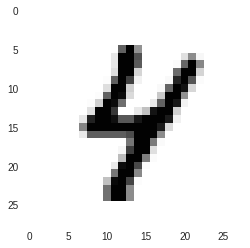

In [10]:
plt.grid(False)
plt.imshow(images[20][0])

In [0]:
features = images.view(images.shape[0], -1)

In [22]:
model = Network()
print(model)

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)


In [23]:
out = model.forward(features)
print(out.shape)
print(out.sum(dim=1))
print(out[20]) #untrained network ==> almost uniform distribution for all digits

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000], grad_fn=<SumBackward1>)
tensor([0.0572, 0.0913, 0.1108, 0.1264, 0.0938, 0.1356, 0.0944, 0.1108, 0.1229,
        0.0568], grad_fn=<SelectBackward>)


In [0]:
#An equivalent and concise defn of Network class using torch.nn.functional
import torch.nn.functional as F
class Network2(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden = nn.Linear(784, 256)
    self.output = nn.Linear(256, 10)
    
  def forward(self, x):
    x = F.sigmoid(self.hidden(x))
    x = F.softmax(self.output(x), dim=1)
    return x

In [34]:
model2 = Network2()
print(model2)

Network2(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)


In [35]:
out2 = model2.forward(features)
print(out2.shape)
print(out2.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000], grad_fn=<SumBackward1>)


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [0]:
#EXERCISE
from torch import nn
import torch.nn.functional as F

class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden1 = nn.Linear(784, 128)
    self.hidden2 = nn.Linear(128, 64)
    self.output = nn.Linear(64, 10)
    
  def forward(self, x):
    x = F.relu(self.hidden1(x))
    x = F.relu(self.hidden2(x))
    x = F.softmax(self.output(x), dim=1)
    return x
    

In [7]:
model = Model()
print(model)

Model(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)
